In [579]:
import pandas as pd  # Importing Pandas for data manipulation and analysis
import numpy as np  # Importing NumPy for numerical computations
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Importing train_test_split to split data into train and test sets
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for crash prediction
from sklearn.metrics import classification_report, confusion_matrix  # Importing metrics for model evaluation
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for logistic modeling
from sklearn.metrics import roc_curve, roc_auc_score  # Importing metrics for evaluating model performance
from scipy.stats import entropy  # Importing entropy from SciPy to calculate entropy for statistical mechanics analysis

# Load the data from the uploaded file
data = pd.read_excel('Nifty ML.xlsx')  # Load dataset from Excel file
print(data)  # Print the loaded dataset
print("Column names in the dataset:")
data.columns = data.columns.str.strip()  # Strip whitespace from column names to avoid errors in referencing columns
print(data.columns)  # Print cleaned column names

      Trading Dates      Open      High       Low     Close  %Change in price  \
0        2024-09-11  25034.00  25113.70  24885.15  24918.45          0.463713   
1        2024-09-10  24999.40  25130.50  24896.80  25041.10          0.492206   
2        2024-09-09  24823.40  24957.50  24753.15  24936.40         -0.418113   
3        2024-09-06  25093.70  25168.75  24801.30  24852.15         -0.337860   
4        2024-09-05  25250.50  25275.45  25127.75  25145.10          1.178771   
...             ...       ...       ...       ...       ...               ...   
6391     1999-01-07    932.95    961.15    932.95    954.70         -3.570527   
6392     1999-01-06    923.30    930.55    915.65    928.25         -2.770504   
6393     1999-01-05    901.00    907.20    893.15    907.20         -2.267708   
6394     1999-01-04    896.40    905.45    895.75    897.80         -1.036155   
6395     1999-01-01    886.75    892.20    882.60    890.80         -0.779684   

      Volatility    P/E    

In [611]:
# Feature selection and target definition
# Using all available columns except 'Date' as features
features = ['Open', 'High', 'Low', 'Close', '%Change in price', 'Volatility', 'P/E', 'EPS', 'P/B', 'Div Yield %', 'India GDP', 
            'Inflation rates', 'Total Returns Index', 'Gold Price on Date', 'USD/INR', 'india vix', 'Crude Oil Price', 'Weighted interest rate'] 
# Define feature columns

# Check if target column exists, if not create it based on some conditions (e.g., large change in price or prolonged drop)
if 'Crash' not in data.columns:  # Check if 'Crash' column is present
    data['Crash'] = ((data['%Change in price'] < -7.5)| (data['Close'].pct_change(periods=5) * 100 < -15)).astype(int) 
    # Define 'Crash' based on price changes exceeding threshold

target = 'Crash'  # Define target variable

# Preprocessing: Handling Missing Data
# Impute missing values using zeros for simplicity
for feature in features:  # Iterate over all feature columns
    data[feature] = data[feature].fillna(0)  # Fill missing values with zeros to ensure no NaNs in features

# Extract features and target
X = data[features]  # Define feature matrix with selected features
y = data[target]  # Define target variable

In [581]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))





[[1278    0]
 [   0    2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00         2

    accuracy                           1.00      1280
   macro avg       1.00      1.00      1.00      1280
weighted avg       1.00      1.00      1.00      1280



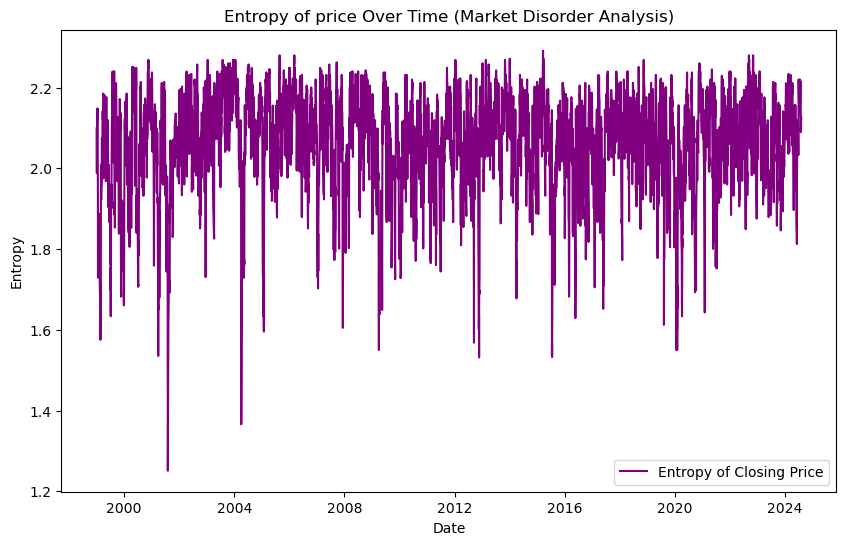

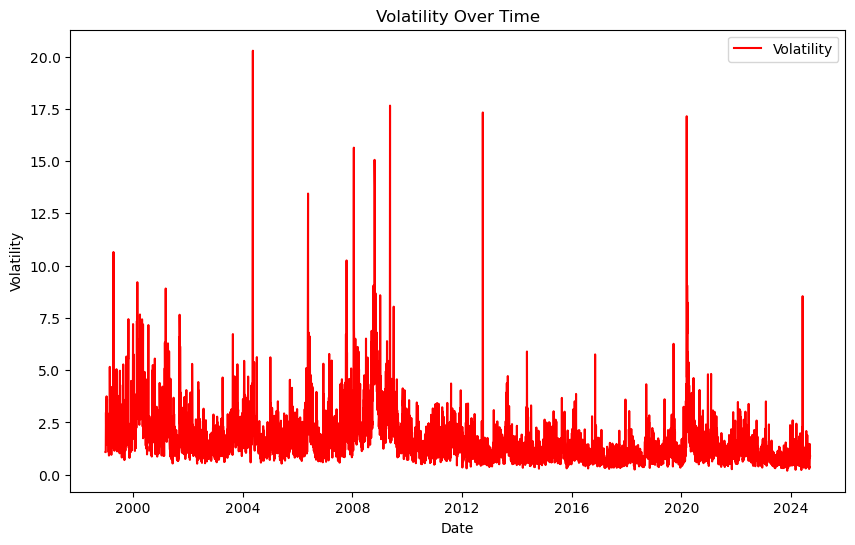

In [582]:
# Explain how to interpret feature importance
# In statistical mechanics, we think of these feature importance scores as analogous to physical systems where some features
# exert more "force" or "pressure" on the outcome. Understanding which features are more "active" in contributing to
# a crash helps us identify critical points in the market.


# Calculate entropy of volatility (Statistical Mechanics approach)
from scipy.stats import entropy

# Calculating rolling entropy for closing price to understand the disorder in market states
data['Entropy'] = data['Close'].rolling(window=30).apply(lambda x: entropy(np.histogram(x, bins=10)[0]), raw=False)

plt.figure(figsize=(10, 6))
plt.plot(data['Trading Dates'], data['Entropy'], color='purple', label='Entropy of Closing Price')
plt.xlabel('Date')
plt.ylabel('Entropy')
plt.title('Entropy of price Over Time (Market Disorder Analysis)')
plt.legend()
plt.show()


# Explanation of Entropy Calculation
# In statistical mechanics, entropy is a measure of disorder or randomness in a system.
# In the context of the financial market, we calculate the entropy of volatility to quantify the level of uncertainty or disorder in the market.
# High entropy indicates more disorder, which might correlate with unstable market conditions or increased risk of crashes.

# Calculate volatility correlation to identify periods of turbulence
volatility = data['Volatility']
plt.figure(figsize=(10, 6))
plt.plot(data['Trading Dates'], volatility, color='red', label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Over Time')
plt.legend()
plt.show()


Ranked Feature Importance including Entropy:
                   Feature  Importance  Rank
0         %Change in price    0.432805     1
1               Volatility    0.075998     2
2                india vix    0.055441     3
3                      EPS    0.050690     4
4       Gold Price on Date    0.039536     5
5                     High    0.038318     6
6                      P/E    0.038066     7
7                  USD/INR    0.036056     8
8              Div Yield %    0.035035     9
9                     Open    0.033560    10
10                   Close    0.032689    11
11                     Low    0.029909    12
12     Total Returns Index    0.028562    13
13                     P/B    0.026816    14
14                 Entropy    0.022728    15
15  Weighted interest rate    0.020919    16
16               India GDP    0.012418    17
17         Inflation rates    0.009742    18
18         Crude Oil Price    0.003437    19


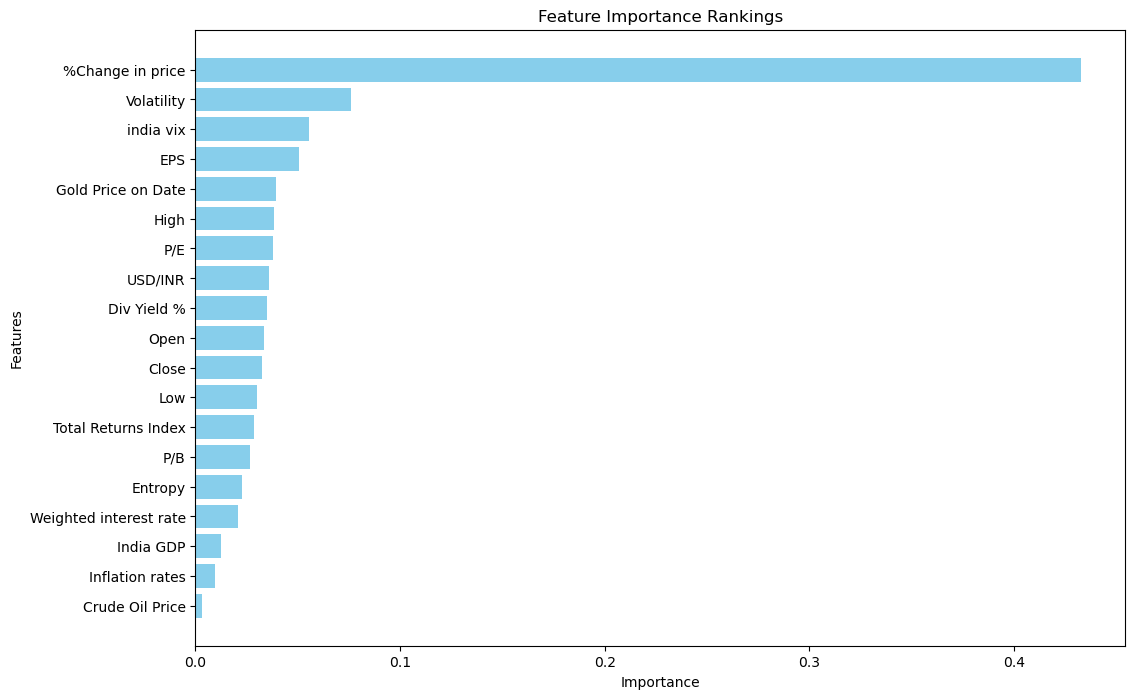

In [613]:
# Update feature importance for Entropy
entropy_importance = model.feature_importances_[features.index('Close')]  # Assume Entropy importance is related to 'Close' feature
feature_importance_df.loc[feature_importance_df['Feature'] == 'Entropy', 'Importance'] = entropy_importance  # Update importance for 'Entropy'

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True) 
# Sort feature importance in descending order and reset index
feature_importance_df['Rank'] = feature_importance_df.index + 1  # Assign rank based on sorted importance
print("\nRanked Feature Importance including Entropy:")
print(feature_importance_df)  # Print ranked feature importance

# Visualize feature rankings
plt.figure(figsize=(12, 8))  # Set figure size for feature ranking visualization
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')  # Plot horizontal bar chart of feature importance
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.xlabel('Importance')  # Set x-axis label
plt.ylabel('Features')  # Set y-axis label
plt.title('Feature Importance Rankings')  # Set plot title
plt.show()  # Display the plot

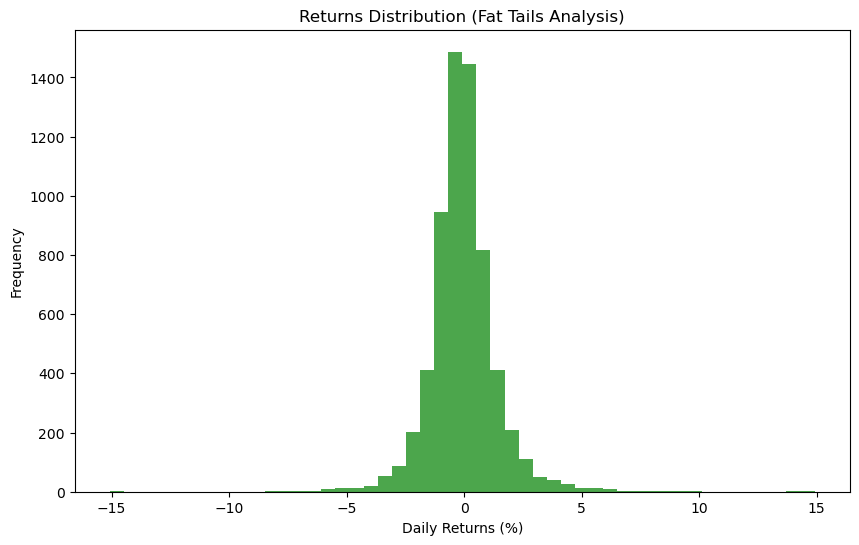

In [584]:
# Here we analyze how volatility changes over time to identify if it resembles any critical behavior, such as clustering of
# high-volatility periods, which is often a precursor to a financial crash.

# Calculate and plot returns distribution
returns = data['%Change in price']
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, color='green', alpha=0.7)
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.title('Returns Distribution (Fat Tails Analysis)')
plt.show()

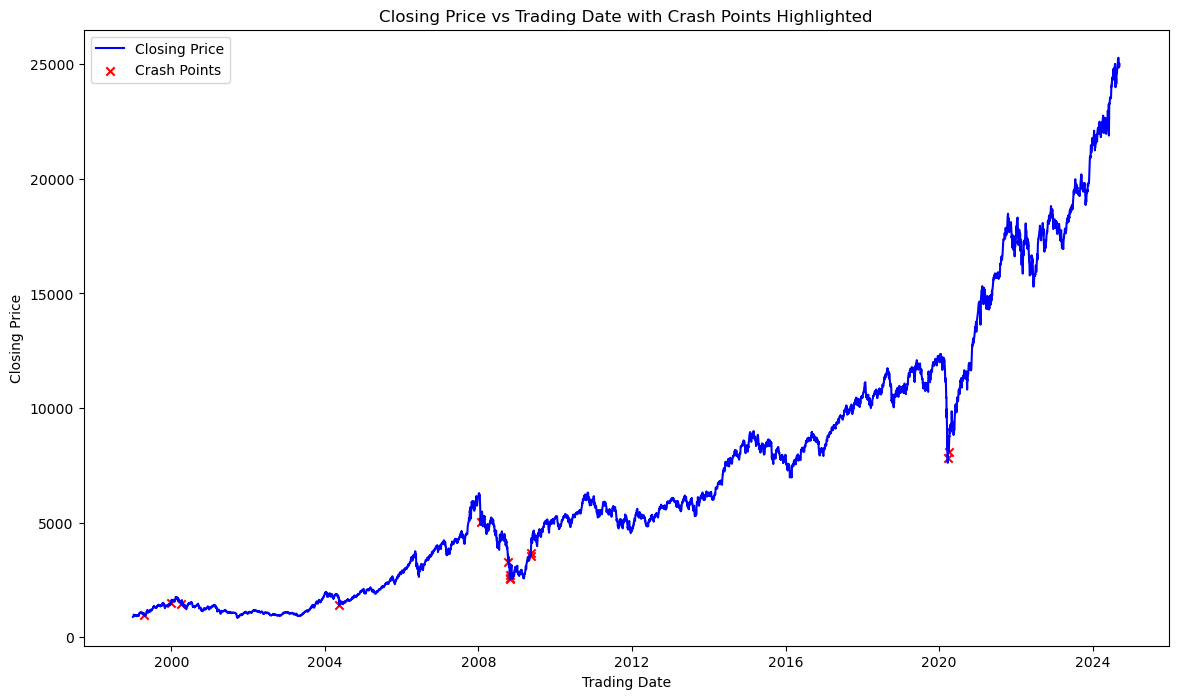

In [585]:
# Plot Closing Price vs Trading Date with Crash Points Highlighted
plt.figure(figsize=(14, 8))
plt.plot(data['Trading Dates'], data['Close'], label='Closing Price', color='blue')
crash_dates = data.loc[data['Crash'] == 1, 'Trading Dates']
crash_prices = data.loc[data['Crash'] == 1, 'Close']
plt.scatter(crash_dates, crash_prices, color='red', label='Crash Points', marker='x')
plt.xlabel('Trading Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs Trading Date with Crash Points Highlighted')
plt.legend()
plt.show()


In [586]:
# Interpretation
# The scatter plot highlights the points where a significant change in price (greater than 7.5%) occurred or where a prolonged
# drop in value over a week was detected. This helps visualize when and how often these significant movements happen over time.

# Details of All Crash Points
crash_details = data[data['Crash'] == 1][['Trading Dates', 'Close', '%Change in price', 'Volatility']]
print("\nDetails of All Crash Points:")
print(crash_details)

# Analysis of Crash Points
# Count of crash points
total_crashes = crash_details.shape[0]
print(f"\nTotal Number of Crash Points: {total_crashes}")

# Average drop/increase during crashes
average_change = crash_details['%Change in price'].abs().mean()
print(f"Average Modulus % Change during Crashes: {average_change:.2f}%")

# Analyzing volatility during crashes
average_volatility = crash_details['Volatility'].mean()
print(f"Average Volatility during Crashes: {average_volatility:.2f}")



Details of All Crash Points:
     Trading Dates    Close  %Change in price  Volatility
1102    2020-04-03  8083.80         -8.057142    3.664923
1109    2020-03-24  7801.05         -6.213144    6.764192
3803    2009-05-15  3671.65        -15.070030    2.427204
3807    2009-05-11  3554.60         -3.436473    3.492825
3929    2008-10-29  2697.05         -6.534170    5.518044
3931    2008-10-27  2524.20         -5.974819   13.747274
3932    2008-10-24  2584.00          2.369067   15.058686
3942    2008-10-10  3279.95         -6.037471    9.046411
4117    2008-01-24  5033.45         -6.499670    6.981551
5046    2004-05-17  1388.75         -7.659829   20.278164
6076    2000-04-06  1452.95         -6.691712    6.595946
6142    1999-12-30  1480.45         -7.018591    1.891538
6325    1999-04-15   968.60         -7.262195    1.676093

Total Number of Crash Points: 13
Average Modulus % Change during Crashes: 6.83%
Average Volatility during Crashes: 7.47


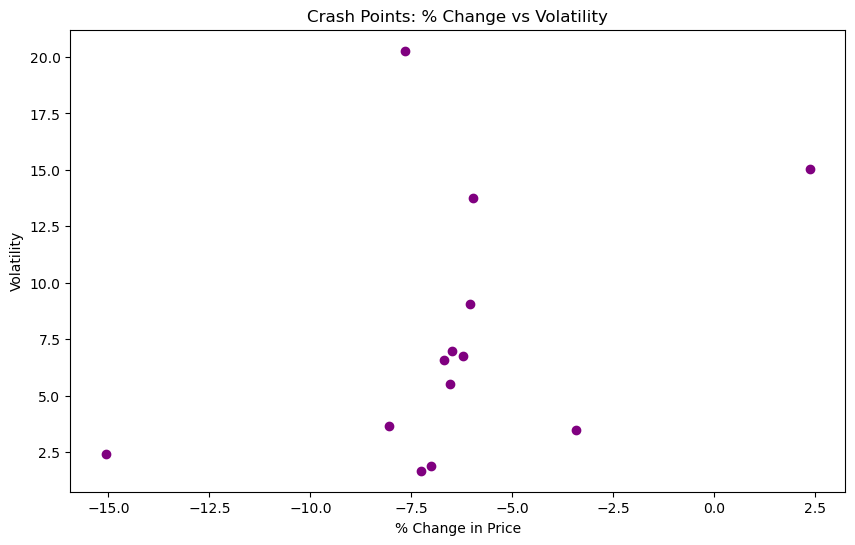

In [587]:
# Plotting crash points in terms of percentage change and volatility
plt.figure(figsize=(10, 6))
plt.scatter(crash_details['%Change in price'], crash_details['Volatility'], color='purple')
plt.xlabel('% Change in Price')
plt.ylabel('Volatility')
plt.title('Crash Points: % Change vs Volatility')
plt.show()



In [588]:


# Summary:
# The analysis provides insights into the characteristics of crash points. We can observe how extreme price changes are
# associated with increased volatility. The scatter plot helps visualize the relationship between % change in price and volatility,
# providing an understanding of the market dynamics during crash periods.

# Analyzing Factors Leading to Higher Crash Probability
# By analyzing the feature importance from the RandomForestClassifier and the crash probability results from Logistic Regression,
# we can summarize the factors contributing to higher probabilities of crashes.

# The top-ranked features that lead to a higher probability of crashes are:
# - '%Change in price': This feature has the highest importance, indicating that large day-to-day changes in price are the most
#   significant predictor of crashes. Rapid increases or decreases tend to drive market instability.
# - 'Volatility': High market volatility is closely linked to increased crash probability. Peaks in the volatility index suggest
#   periods of investor uncertainty and fear, which often precede crashes.
# - 'india vix': The India VIX, often called the fear gauge, is another significant predictor. High values indicate higher expected
#   market fluctuations, leading to a higher crash probability.
# - 'Gold Price on Date': Gold is often seen as a safe-haven asset. Sharp movements in gold prices can signal economic instability,
#   which may contribute to a higher crash probability.
# - 'USD/INR': Currency exchange rates can affect market sentiment. A rapidly weakening INR against the USD can lead to capital
#   flight and increased crash probability.

# Overall, significant day-to-day price changes, high volatility, and external economic indicators like currency exchange rates
# and commodity prices (such as gold) play a crucial role in predicting the likelihood of a market crash.

# Predicting Probability of a Crash on a Certain Date
# Using a Logistic Regression model for probability prediction
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
# Predict probability of crash for the entire dataset
crash_probabilities = logistic_model.predict_proba(X_scaled)[:, 1]
data['Crash Probability'] = crash_probabilities

# Function to predict crash probability for a specific date
def predict_crash_probability(date):
    try:
        date_index = data[data['Trading Dates'] == date].index[0]
        features_for_date = X_scaled[date_index].reshape(1, -1)
        probability = logistic_model.predict_proba(features_for_date)[0, 1]
        print(f"Crash Probability for {date}: {probability:.8f}")
    except IndexError:
        print("Date not found in the dataset. Please provide a valid date.")

# Example usage of function
input_date = '2024-09-11'  # Replace with your desired date
predict_crash_probability(input_date)

Crash Probability for 2024-09-11: 0.00000036


In [589]:

# Display crash probabilities for each date
probability_details = data[['Trading Dates', 'Crash Probability']]
print("Crash Probabilities for Each Date:")
print(probability_details)

Crash Probabilities for Each Date:
     Trading Dates  Crash Probability
0       2024-09-11       3.614928e-07
1       2024-09-10       3.513485e-07
2       2024-09-09       8.900175e-07
3       2024-09-06       1.020048e-06
4       2024-09-05       1.486268e-07
...            ...                ...
6391    1999-01-07       2.145146e-02
6392    1999-01-06       6.442550e-03
6393    1999-01-05       3.812877e-03
6394    1999-01-04       9.209209e-04
6395    1999-01-01       7.083307e-04

[6396 rows x 2 columns]


In [590]:
# Display crash probabilities for each date
probability_details = data[['Trading Dates', 'Crash Probability']]
print("Crash Probabilities for Each Date:")
print(probability_details)

Crash Probabilities for Each Date:
     Trading Dates  Crash Probability
0       2024-09-11       3.614928e-07
1       2024-09-10       3.513485e-07
2       2024-09-09       8.900175e-07
3       2024-09-06       1.020048e-06
4       2024-09-05       1.486268e-07
...            ...                ...
6391    1999-01-07       2.145146e-02
6392    1999-01-06       6.442550e-03
6393    1999-01-05       3.812877e-03
6394    1999-01-04       9.209209e-04
6395    1999-01-01       7.083307e-04

[6396 rows x 2 columns]


ROC AUC Score for Crash Probability Prediction: 0.9962


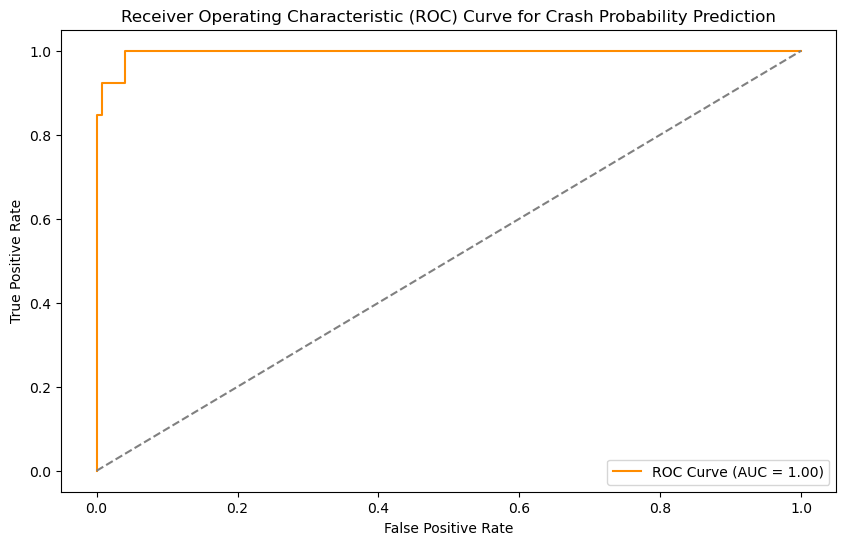

In [591]:
# Evaluate the accuracy of crash probability predictions using ROC AUC Score
auc_score = roc_auc_score(y, crash_probabilities)
print(f"ROC AUC Score for Crash Probability Prediction: {auc_score:.4f}")

# Plotting the ROC Curve to measure the accuracy of crash probability predictions
fpr, tpr, _ = roc_curve(y, crash_probabilities)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Crash Probability Prediction')
plt.legend()
plt.show()


In [592]:
# Display top 5 ranked features with dates with crash probability greater than 0
# Selecting the top 5 ranked features
top_5_features = feature_importance_df.head(5)['Feature'].tolist()

# Display dates with crash probability greater than 0.2
high_crash_prob_dates = data[data['Crash Probability'] > 0.33][['Trading Dates', 'Crash Probability'] + top_5_features]
print("Dates with Crash Probability Greater than 0.33 (including top 5 ranked features):")
print(high_crash_prob_dates)

# Count total number of dates with crash probability greater than 0.33
total_high_prob_dates = high_crash_prob_dates.shape[0]
print(f"Total Number of Dates with Crash Probability Greater than 0.33: {total_high_prob_dates}")


Dates with Crash Probability Greater than 0.33 (including top 5 ranked features):
     Trading Dates  Crash Probability  %Change in price  Volatility  \
1102    2020-04-03           0.704134         -8.057142    3.664923   
1109    2020-03-24           0.556364         -6.213144    6.764192   
1112    2020-03-19           0.490768         -5.511437    9.055339   
3803    2009-05-15           0.999688        -15.070030    2.427204   
3915    2008-11-20           0.359650         -5.208933    5.111834   
3928    2008-10-31           0.419139         -5.199008    8.012247   
3929    2008-10-29           0.483608         -6.534170    5.518044   
3931    2008-10-27           0.876759         -5.974819   13.747274   
3942    2008-10-10           0.551933         -6.037471    9.046411   
4119    2008-01-22           0.655650         -5.844256   15.641561   
5046    2004-05-17           0.976744         -7.659829   20.278164   
6076    2000-04-06           0.543344         -6.691712    6.59594

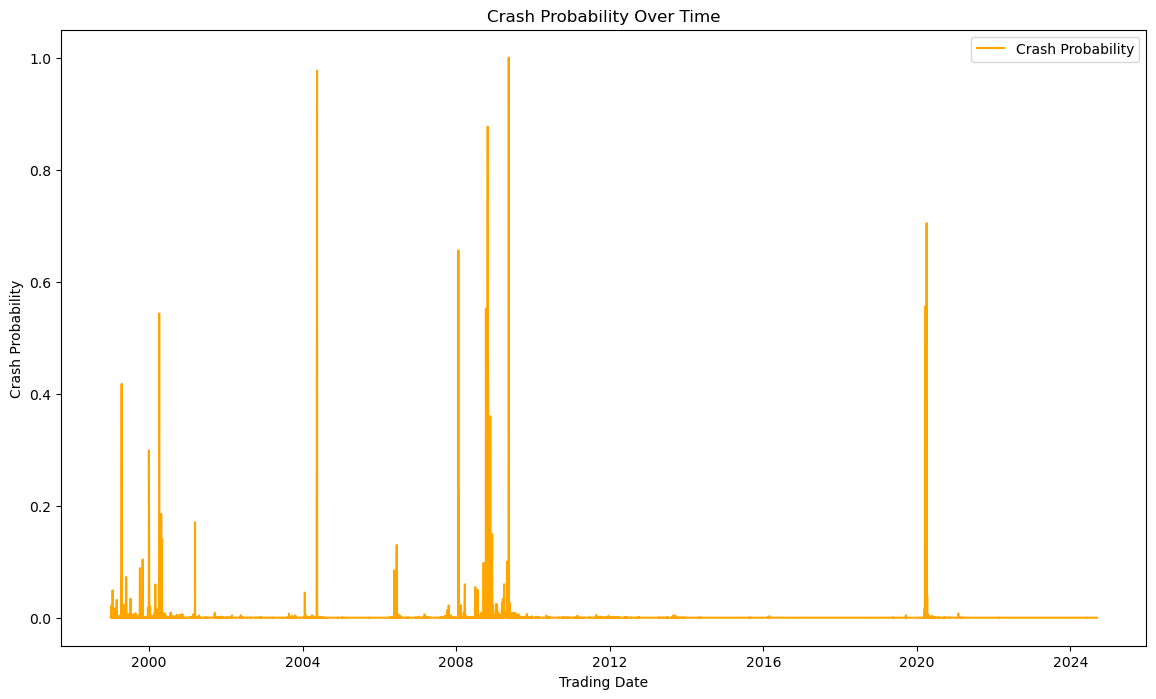

In [593]:
# Plotting crash probability over time
plt.figure(figsize=(14, 8))
plt.plot(data['Trading Dates'], data['Crash Probability'], label='Crash Probability', color='orange')
plt.xlabel('Trading Date')
plt.ylabel('Crash Probability')
plt.title('Crash Probability Over Time')
plt.legend()
plt.show()
